## Inference
Checking on the X_test and y_test that wasn't part if the training.   
We trained the model on Kaggle website on their services, and did the inference in our local computer.
All of oure datasets, and the prepared datasets (.npy files, divided to train test and validation).

In [1]:
import numpy as np
import random
import time
from datetime import timedelta
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.layers import BatchNormalization
from keras.callbacks import TensorBoard,ModelCheckpoint
from keras import backend as K
from keras.metrics import top_k_categorical_accuracy
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Activation
import tensorflow.keras.backend as K
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import itertools
import os

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          fname='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, format(cm[i, j]*100, fmt) + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")    
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(fname, bbox_inches='tight', pad_inches=1)

In [3]:
# Loading the model  for inference, 
from tensorflow.keras.models import load_model
loaded_model = load_model(os.path.join(r"C:\Users\חנן\Downloads", 'model.h5'))

In [4]:
# Loading the data for the inference
X_test = np.load(r'C:\Users\חנן\Downloads\reg_X_direction_test.npy')
y_test_true = np.load(r'C:\Users\חנן\Downloads\reg_y_direction_test.npy')

In [5]:
# Preparing tge data for infernce
X_test = np.expand_dims(X_test, axis=1)

In [6]:
X_test.shape

(141, 1, 1500, 1500)

In [7]:
class_names = ["voip", "video", "file transfer", "chat"]
num_classes = 4

In [8]:
y_test = to_categorical(y_test_true, num_classes)
print(y_test[0:10])
print(y_test.shape)

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
(141, 4)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
Total inference time: 0:00:00.759022

Classification Report:
               precision    recall  f1-score   support

         voip       1.00      0.91      0.95        23
        video       1.00      0.93      0.97        30
file transfer       0.97      0.99      0.98        72
         chat       0.84      1.00      0.91        16

     accuracy                           0.96       141
    macro avg       0.95      0.96      0.95       141
 weighted avg       0.97      0.96      0.96       141

Normalized confusion matrix
[[0.91304348 0.         0.04347826 0.04347826]
 [0.         0.93333333 0.03333333 0.03333333]
 [0.         0.         0.98611111 0.01388889]
 [0.         0.         0.         1.        ]]


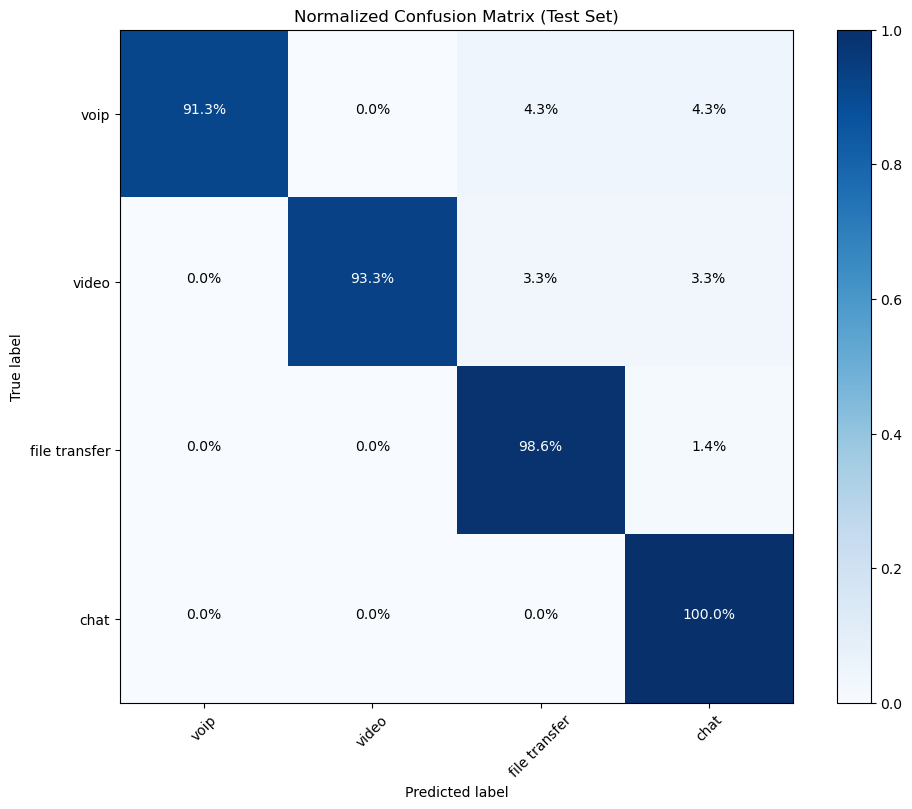


Test Accuracy: 0.9645


In [9]:
start_test_time = time.time()

# Get predictions
y_test_pred = loaded_model.predict(X_test,verbose=1)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

infrence_time = time.time() - start_test_time 
print(f'Total inference time: {timedelta(seconds=infrence_time)}')


# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_true, y_test_pred_classes, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_true, y_test_pred_classes)
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                     title='Normalized Confusion Matrix (Test Set)')
plt.show()

# Print overall accuracy
accuracy = np.mean(y_test_pred_classes == y_test_true)
print(f"\nTest Accuracy: {accuracy:.4f}")